
# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It contains 10866 rows and 21 columns. It contains data from year 1960 - 2015. The following are the column names and their significance:
- id: The movie's ID,
- imdb_id: The movie's IMDB ID,
- popularity: The movie's popularity rating,
- budget: The budget for the movie in USD,
- revenue: contains information on the revenue realised from the movie in USD,
- original_title: Title of the movie,
- cast: Names of the  main casts of the movie,
- homepage: contains the link to the movies hompage,
- director: contains the name of The movie's director,
- tagline: website's tagline,
- overview: contains the plot of the movie,
- runtime: length of the movie in minutes,
- genres: contains genres of the movie seperated by "|",
- production_companies: containsthe poduction companies involved in movie seperated by "|",
- release_date: The movie's release date,
- vote_count: the vote count,
- vote_average: contains the average vote count,
- release_year: date movie was released,
- budget_adj: adjusted budjet based on value of dollar at 2010,
- revenue_adj: adjusted revenue based on value of dollar at 2010


### Questions for Analysis
I am going to consider the following questions for this analysis:
1. What are top 10 popular movies within this time?
2. What Movies accrued the largest revenue?
3. Does a bigger budget lead to bigger revenue?
4. Does higher run time lead to higher revenue?
5. What properties are associated with movies that have high revenues?


In [1]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Loading data into a pandas dataframe
df = pd.read_csv('tmdb-movies.csv')
print(df.shape)
df.head()

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


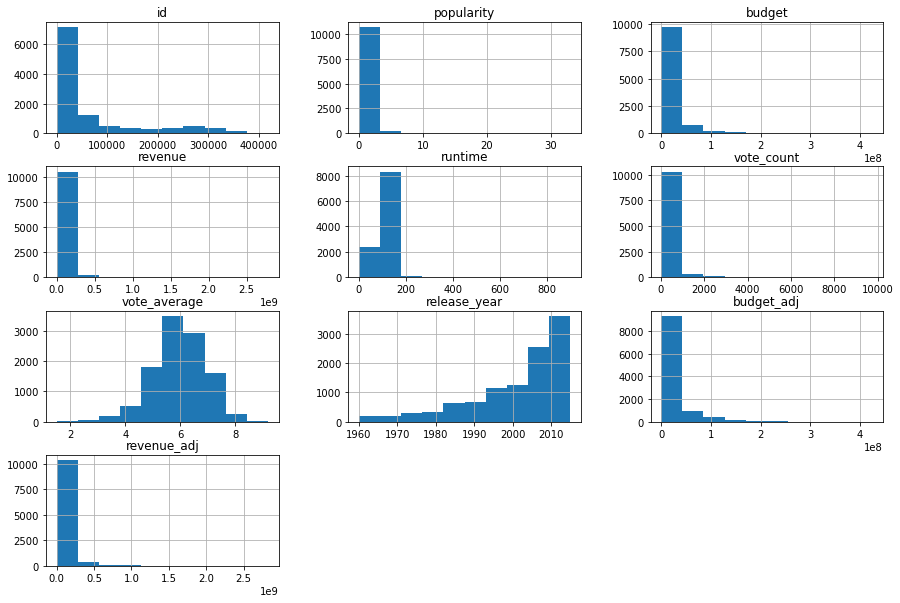

In [8]:
df.hist(figsize=(15,10));

## Data Cleaning


### Dropping columns that are not relevant to the analysis

In [9]:
# drop id, imdb id, cast, homepage, director, tagline, keywords, overview
df.drop(columns=['id', 'imdb_id','cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies'], inplace=True)
df.shape

(10866, 12)

### Drop duplicate columns

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(10865, 12)

### Drop columns with null values

In [11]:
df.dropna(inplace = True)
df.shape

(10842, 12)

In [12]:
df.head(3)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What are top 10 popular movies within this time?
I choose to answer this question because as someone who likes watching movies, I want to know the most popular movies to check whether I've seen them. Also, more importantly, someone can collect more information on the popular movies, to analyse why these movies were popular in order to correctly promote his movie.

###### I'm going to start by sorting the dataframe in descending order by the popularity column and selecting the first ten

In [13]:
#sort dataset by popularity
pop_movies = df.sort_values('popularity', ascending=False)[['original_title', 'popularity']].iloc[:10]
pop_movies

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


###### here I'm creating a function for plotting differerent charts. To avoid repetitive coding
The function will be used to create barcharts, scatter plots and regplots

In [14]:
def plot(kind, x, y, title, xlab, ylab):
    fig,ax = plt.subplots(figsize=(10,6))
    if kind == 'barh':
        plt.barh(x, y)
    elif kind == 'scatter':
        plt.scatter(x=x, y=y)
    elif kind == 'reg':
        sns.regplot(x=x, y=y)
    else:
        plt.bar(x=x, height=y)
        plt.xticks(rotation = 90)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

###### Next, I'm going to use the function to create a barchart that shows the top ten movies with their popularity rating
I'm using a barchart because it's going to make it easier to see the movies with their popularity rating

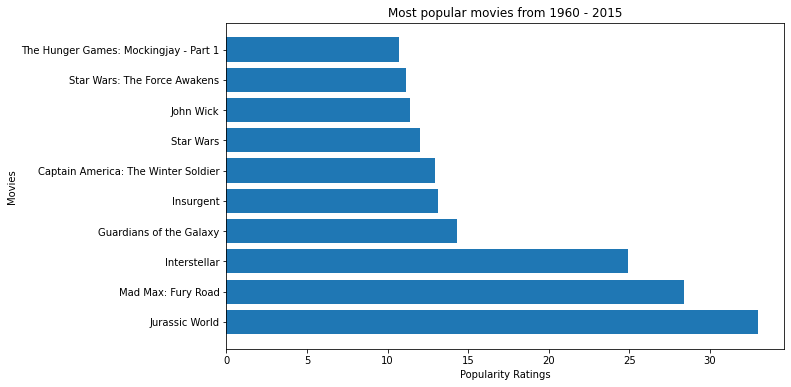

In [15]:
plot('barh',pop_movies['original_title'],pop_movies['popularity'],'Most popular movies from 1960 - 2015', 'Popularity Ratings', 'Movies');

The barchart shows that Jurassic World was the most popular movie within this time. With a popularity rating of more than 30. Followed by Mad Max: Fury Road, with a popularity rating of almost 30 and Interstellar with a popularity rating of 25. These 3 are the most popular followed by Guardians of the Galaxy, Insurgent, etc.

### Research Question 2: What Movies accrued the largest revenue?
This question is equally important because one might be interested in studying why these movies accrued high revenues to aid him make high revenue from his movie. 

###### Same with Question (1), I'm going to start by sorting the dataframe in descending order by revenue
I'm sorting in descending order so that the biggest values will appear first. I'm also subsetting only the original_title and revenue columns

In [16]:
#sorting the dataframe by revenue
high_returns = df.sort_values(by='revenue', ascending=False)[['original_title', 'revenue']].iloc[:10]
high_returns

,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810
4,Furious 7,1506249360
14,Avengers: Age of Ultron,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822
5422,Frozen,1274219009
5425,Iron Man 3,1215439994


###### I'm also going to use a barchart to represent the top 10 movies with the highest revenues

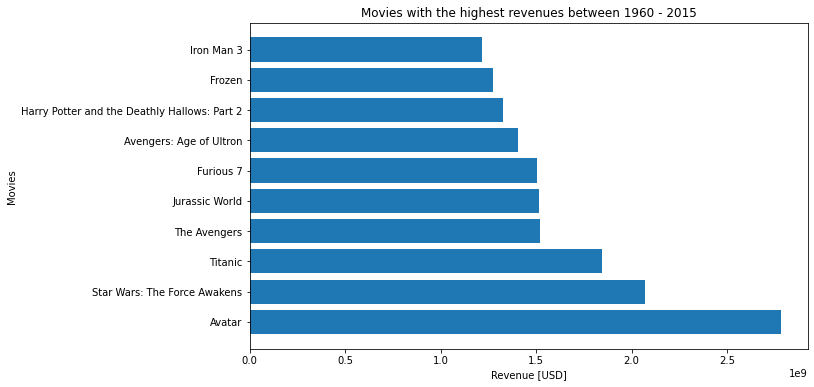

In [17]:
#plotting a barchart of top 10 movies by revenue
plot('barh',high_returns['original_title'],high_returns['revenue'],'Movies with the highest revenues between 1960 - 2015', 'Revenue [USD]', 'Movies');

The barchart shows that Avatar accrued the highest revenue of more than 2.5 billion USD, seconded by Star Wars: The Force Awakens with revenue a little over 2 billion USD, followed by Titanic, The Advengers, etc

### Research Question 3: Does a bigger budget lead to bigger revenue?
I posed this question because I wanted to see how the budget of a movie affected the revenue. It is important because one needs the assurance of good returns on investment to invest more in a movie

###### To answer this question, I will use plot a scatter plot to show the relationship between budget and revenue
Here, I'll be using the plot function to plot the scatter plot

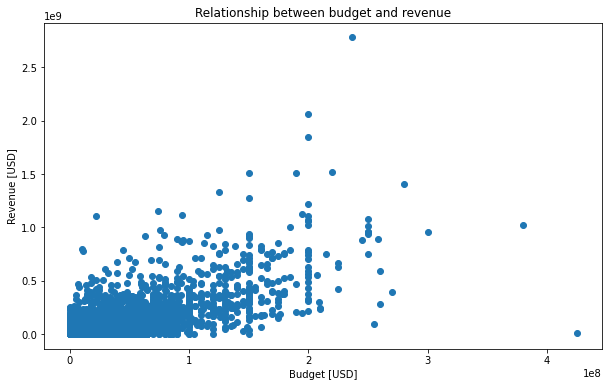

In [18]:
#plotting a scatter plot to show the relationship between budget and revenue
plot('scatter',df['budget'], df['revenue'],'Relationship between budget and revenue', 'Budget [USD]', 'Revenue [USD]');

The barchart shows a positive correlation between revenue and budget, But it is not visibly clear how strong this relationship is. So, I'm going to use the corr() method to print out the correlation between the two variables. 

In [19]:
#printing out the correlation coefficient
df['budget'].corr(df['revenue'])

0.734851131007623

The correlation coefficient shows that there is a strong positive correlation between budget and revenue. Which implies that the higher the budget of a movie, the higher the revenue. This answers the question that, yes, a bigger budget will likely lead to a bigger revenue.

### Research Question 4: Does higher runtime lead to higher revenue?
I'm also interested in finding out if longer runtime yields higher revenues. It is important to know this because production cost can be cut by reducing the runtime if it does not significantly affect the revenue or negatively affects the revenue.

###### Here, I'm going to use the seaborn regression plot to more visibly show where the line cuts through the data
I'll be using the plot function to plot a scatter plot of revenue against runtime

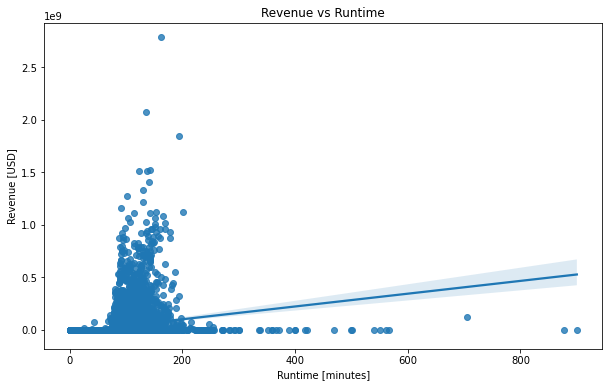

In [20]:
#plotting a regression plot to show the relationship between runtime and revenue
plot('reg',df['runtime'], df['revenue'],'Revenue vs Runtime', 'Runtime [minutes]', 'Revenue [USD]');

The scatter plot shows a weak positive relationship between Revenue and Runtime. To find out how weak this relationship is, I'm going to go ahead and also use the corr() method to print out the correlation between revenue and runtime.

In [21]:
#printing out the correlation coefficient
df['runtime'].corr(df['revenue'])

0.16275535067867417

The correlation coefficient confirms the weak relationship between runtime and revenue. It can be implied that increasing the runtime of a movie will not significantly increase the revenue or may have close to no effect on the revenue

### Research Question 5: What properties are associated with movies that have high revenues?
This question is important as one needs to know what properties made these movies accrue high revenue in other to replicate them in his project.

###### I will start by sorting the dataframe in descending order by revenue, selecting the top 100 movies and storing them in a variable 'high revenue movies'. 
I'll use this table to check the most common genres in the top 100 revenue earning movies

In [22]:
#filtering out the top 100 movies by revenue
high_revenue_movies = df.sort_values(by='revenue', ascending=False).iloc[:100]
high_revenue_movies.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000,2781505847,Avatar,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,4.355219,200000000,1845034188,Titanic,194,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,7.637767,220000000,1519557910,The Avengers,143,Science Fiction|Action|Adventure,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Checking which genres are associated with high revenues

I'll use split and sum methods to get a list of all genres in the dataset. I'll then use the numpy 'unique' method to get a list of unique genres in the dataframe. I'm going use this list to plot a barchart later

In [23]:
#creating a list of unique genres
genres = df['genres'].str.split('|').sum()
unique_genres = np.unique(genres)
unique_genres

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype='<U15')

Next, I am going to use a for loop to populate the gen_rev list with the mean revenues. And also populate the lab list with genre names which i'm going to use to label my barcharts

In [24]:
# creating a list of mean revenues and labels
gen_rev = []
lab = []
for item in unique_genres:
    gen_rev.append(df[df['genres'].str.contains(item)]['revenue'].mean())
    lab.append(item)

Below, I'll be plotting a barchart of the mean revenue of the unique genres for the entire dataset. This is to visualize how revenue is distributed among genres in the dataset. 

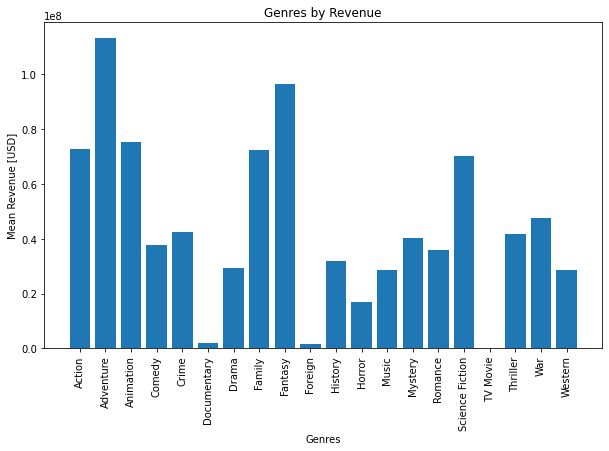

In [25]:
#plotting a barchart of genres by mean revenue
plot('bar', lab, gen_rev,'Genres by Revenue', 'Genres', 'Mean Revenue [USD]');

By looking at the chart above, one can see which genres are associated with high revenue. Below, I will use the count method to check the common genres in "high_revenue_movies". I'll use the for loop to populate the genre_count list with the count of each genre

In [26]:
#getting the count of the number of times each genre appears in the top 100
genre_count = []
for item in unique_genres:
    genre_count.append(high_revenue_movies['genres'].str.contains(item).sum())

Next, I will use the plot function to plot a barchart of genre_count against genre names

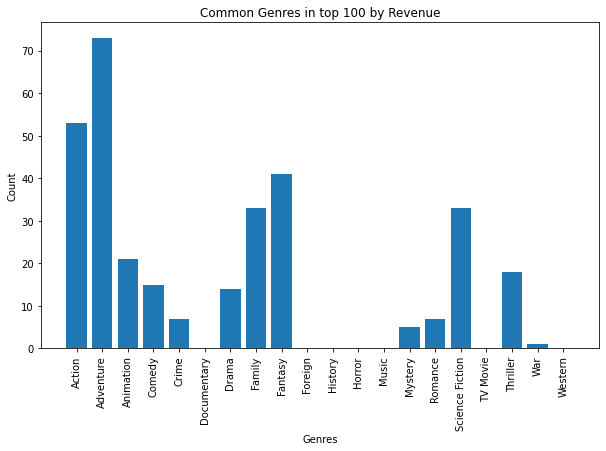

In [27]:
#plotting a barchart to represent top genres in the dataset
plot('bar',lab, genre_count,'Common Genres in top 100 by Revenue', 'Genres', 'Count');

This barchart shows the genres in the dataset and the number of times it appears in the top 100 movies. It shows clearly that the adventure genre is most common, followed by action, fantacy and sci-fi. I'm going to use a pie chart to show the proportions.

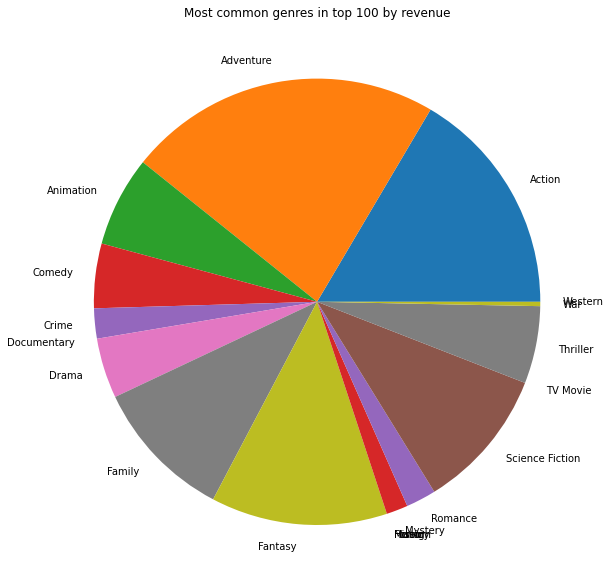

In [28]:
#ploting a piechat of common genres in top 100 movies by revenue
fig,ax = plt.subplots(figsize=(10,15))
plt.pie(genre_count, labels = lab)
plt.title('Most common genres in top 100 by revenue');

This chart also shows that the bulk of movies with high revenue are movies in the Adventure genre, followed by, Action, Fantacy, Family and Sci-Fi genres

### Relationship between Revenue, Budget and Popularity

To check the the relationship between Revenue and Budget. I will use the seaborn regression plot.

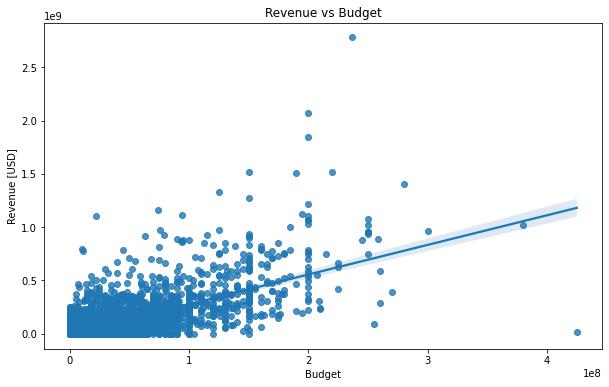

In [29]:
#regression plot to show the relationship between budget and revenue
plot('reg',df['budget'], df['revenue'],'Revenue vs Budget', 'Budget', 'Revenue [USD]');

The scatter plot shows a strong relationship between the budget and revenue. Below, I'm going to use the corr() method to print out the correlation coefficient.

In [30]:
#printing the correlation between revenue and budget
df['budget'].corr(df['revenue'])

0.734851131007623

The correlation coefficient confirms the strong positive relationship that exists between budget and revenue. This shows that high budgets is associated with movies with high revenues.
Next, I'm also going to use the seaborn regression plot to visualize the relationship between popularity and revenue.

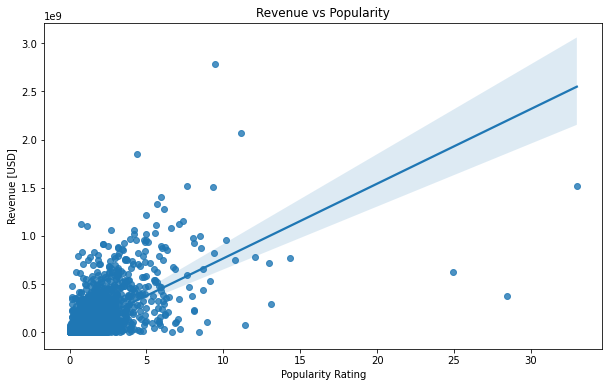

In [31]:
#regression plot to show the relationship between popularity and revenue
plot('reg',df['popularity'], df['revenue'],'Revenue vs Popularity', 'Popularity Rating', 'Revenue [USD]');

In [32]:
#printing out the correlation between popularity and revenue
df['popularity'].corr(df['revenue'])

0.6632680916922675

Both the scatter plot and correlation coefficient show a strong positive correlation between popularity and revenue. Which means, more popular movies accrue high revenues

Below, I'm going to plot a seaborn heatmap to show the relationship between revenue and some numeric variables in the dataset

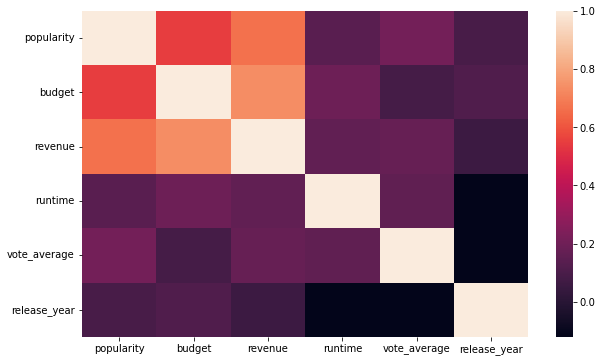

In [33]:
#plotting a heatmap to show the correlation between some numeric variables. Most importantly to show how each affects Revenue 
corr = df.select_dtypes('number').drop(columns=['budget_adj', 'revenue_adj', 'vote_count']).corr()
fig,ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr);

The heatmap shows the correlation between different numerical variables in the dataset. It can be used to tell which properties have a more impact on revenue.

<a id='conclusions'></a>
## Conclusions
Below is the results I derived from my analysis and how I got to this conclusions:

1. To answer the question "What are top 10 popular movies within this time?", I sorted the dataframe by the popularity column in descending order and then selected the first ten rows of the popularity and title column and stored the result in a variable. Then I plotted a barchart with the result. The barchart showed that Jurrassic World is the most popular movie within this time period, followed by Mad Max: Fury, Interstellar and Guardians of the Galaxy.
2. To answer question (2), I Used the same method stated in (1) above. I selected the revenue and title column and plotted a barchart. The barchart showed Avatar, accrued the highest revenue, followed by Star wars, Titanic, The Avengers and Jurrassic Worlds.
3. For question (3), I plotted a scatter plot of Revenue against Budget. The plot showed that Budget and Revenue are correlated. To further check how strong the correlation was, I used the corr() method to print out the correlation between Budget and revenue. This showed a strong positive correlation of 0.735, Which implies that an Increase in the budget for a movie, will most likely lead to an increase in revenue.
4. I answered question (4) Using the same method stated in (3) above, the results showed that runtime is positively correlated with revenue. But this was weak correlation (0.163). Which implies that the runtime of a movie has very little to no effects on the revenue.
5. To answer question(5), The dataset was sorted in decending order by revenue and the top 100 movies were selected. A barchart was plotted to show the count of each each genre in the top 100. It was found that majority of the movies were of the Adventure genre, followed by Action, then Fantacy, Family and Sci-Fi. Also scatter plots were plotted to show the relationship between popularity, budget and revenue. The Budget for the movie and Popularity was found to be strongly and positively correlated with the Revenue. Therefore, high revenue movies are associated with big budgets, high popularity and are often movies in the adventure, action, fantacy, family and sci-fi genres. A heatmap was also plotted to further show the correlation between the different numeric variables.

### Limitations
 - The dataset contains data that ranges from 1960 - 2015. Therefore, the findings of this analysis cannot be genralised to recent events.
 - The genres were joined together in a column, therefore the sum of revenue for a particular genre is not the actual sum for just that genre. And does not represent the amount that the particular genre contributed to the sum. Additional information on revenue for each genre would be needed to clearly state which genres are associated with high revenue.

### Resources
- [How to merge a list](https://thispointer.com/python-how-to-merge-two-or-more-lists/)
- [plt.bar documentation](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.bar.html)
- [sns.regplot usage](https://seaborn.pydata.org/generated/seaborn.regplot.html)
- [How to select unique values from a list](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])